### Ensembled Modelling
**(STAGE 1 Ensemble)**: Check correlation between predictions made by initial stage models. Choose only models with low correlation as candidate models. <br>

In [32]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [33]:
features = pd.read_csv('../data/preprocessed-train.csv', index_col = 'bookingID')

In [34]:
y = pd.read_csv('../data/ori_labels.csv', index_col = 'bookingID')

In [35]:
label = pd.merge(features.reset_index(), y, on='bookingID')['label']

In [36]:
with open('../model_weights/model-config.pkl', 'rb') as f:  
    model_config = pickle.load(f)

#### Train all models on full data

In [37]:
logistic = LogisticRegression(**model_config['logistic']['hyperparams'], max_iter=500)
logistic.fit(features[model_config['logistic']['col_names']], label)
pred_logistic = logistic.predict_proba(benchmark[model_config['logistic']['col_names']])

In [26]:
lda = LinearDiscriminantAnalysis(**model_config['lda']['hyperparams'])
lda.fit(features[model_config['lda']['col_names']], label)
pred_lda = lda.predict_proba(benchmark[model_config['lda']['col_names']])

In [27]:
naivebayes = GaussianNB(**model_config['naivebayes']['hyperparams'])
naivebayes.fit(features[model_config['naivebayes']['col_names']], label)
pred_naivebayes = naivebayes.predict_proba(benchmark[model_config['naivebayes']['col_names']])

In [28]:
xgboost = XGBClassifier(**model_config['xgboost']['hyperparams'])
xgboost.fit(features[model_config['xgboost']['col_names']], label)
pred_xgboost = xgboost.predict_proba(benchmark[model_config['xgboost']['col_names']])

In [30]:
mlp = MLPClassifier(**model_config['mlp']['hyperparams'], max_iter=500)
mlp.fit(features[model_config['mlp']['col_names']], label)
pred_mlp = mlp.predict_proba(benchmark[model_config['mlp']['col_names']])

***

In [13]:
pred_array = np.transpose(np.vstack((pred_logistic[:, 1], pred_lda[:, 1], pred_naivebayes[:, 1], pred_rf[:, 1], pred_xgboost[:, 1], pred_mlp[:, 1])))

In [14]:
df = pd.DataFrame(pred_array, columns=['logistic', 'lda', 'naivebayes', 'rf', 'xgboost', 'mlp'])

In [15]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

,logistic,lda,naivebayes,rf,xgboost,mlp
logistic,1,0.977745,0.659472,0.883247,0.921678,0.879268
lda,0.977745,1,0.682609,0.887146,0.91792,0.879868
naivebayes,0.659472,0.682609,1,0.66296,0.665071,0.603837
rf,0.883247,0.887146,0.66296,1,0.93991,0.849023
xgboost,0.921678,0.91792,0.665071,0.93991,1,0.884215
mlp,0.879268,0.879868,0.603837,0.849023,0.884215,1


#### Distribution of probabilty

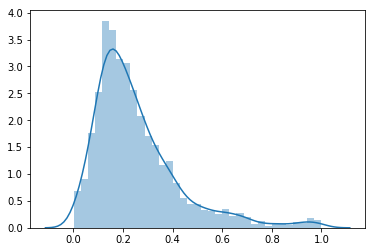

In [16]:
sns.distplot(pred_logistic[:, 1])

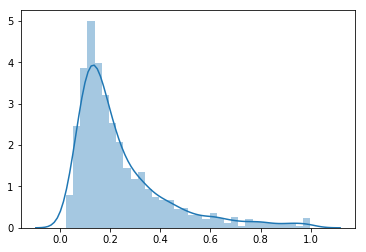

In [17]:
sns.distplot(pred_lda[:, 1])

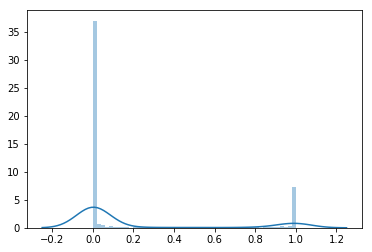

In [18]:
sns.distplot(pred_naivebayes[:, 1])

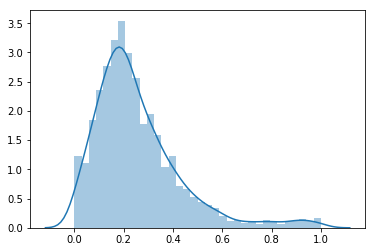

In [19]:
sns.distplot(pred_rf[:, 1])

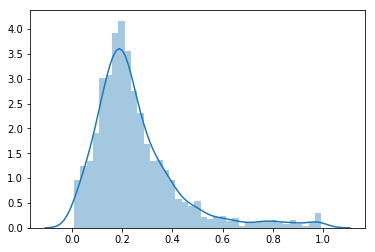

In [20]:
sns.distplot(pred_xgboost[:, 1])

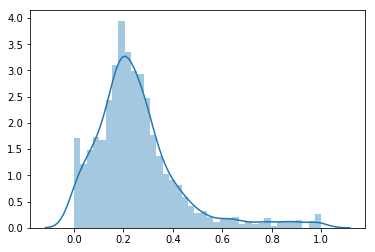

In [21]:
sns.distplot(pred_mlp[:, 1])

### Save Weak Learners

In [31]:
with open('../model_weights/mlp.dat', 'wb') as f:  
    pickle.dump(mlp, f)
    
with open('../model_weights/naivebayes.dat', 'wb') as f:  
    pickle.dump(naivebayes, f)